In [7]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the DB file in Google Drive  (Local file / db Path)
file_path = '/content/drive/MyDrive/Collab_finalprj/IOT_Assignment_DB/household_power_consumption.txt'

# Load the dataset with explicit datetime parsing
data = pd.read_csv(
    file_path,
    sep=';',
    low_memory=False,
    na_values=['?', 'NA'],
)

# Combine and convert the 'Date' and 'Time' columns into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop the original 'Date' and 'Time' columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Display the first few rows of the cleaned dataset
data.head()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


Summary statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
5

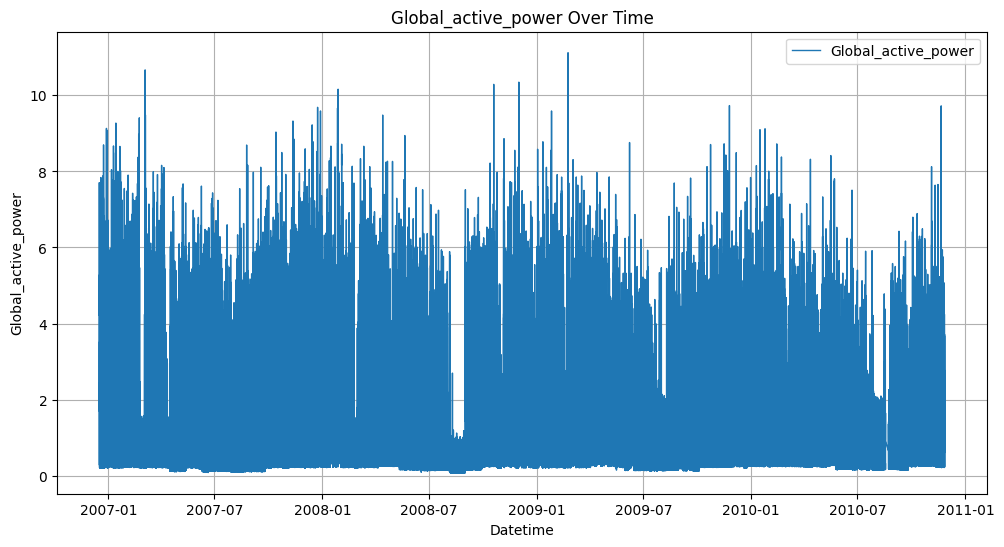

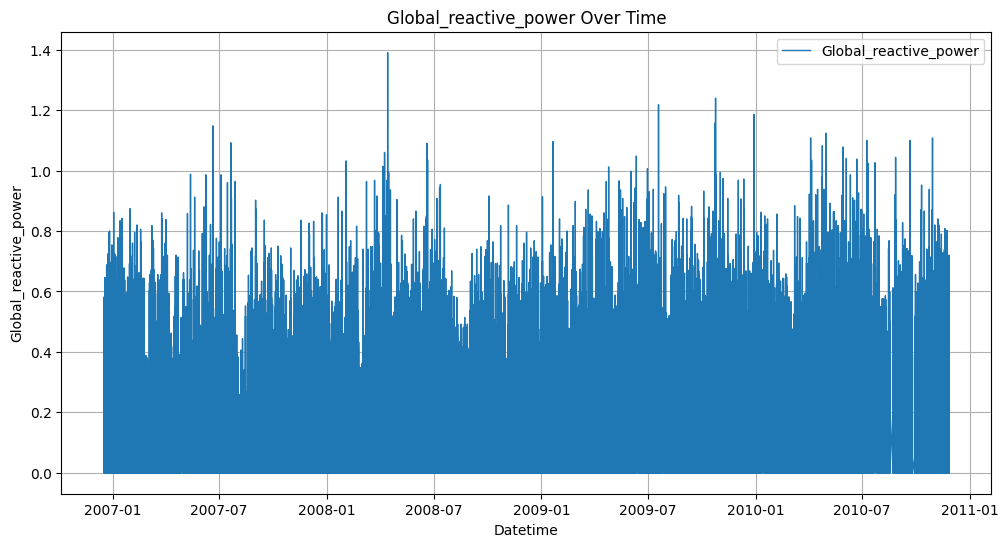

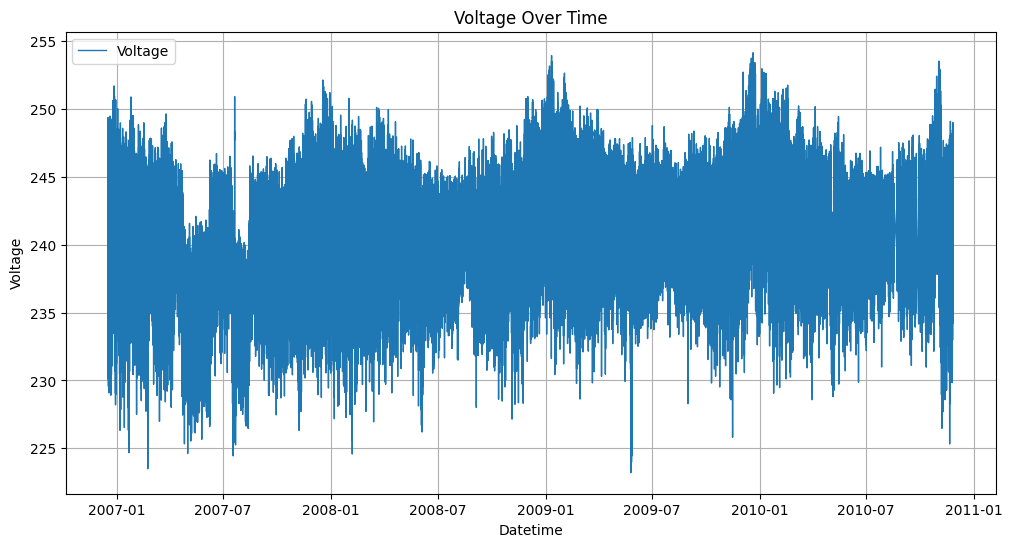

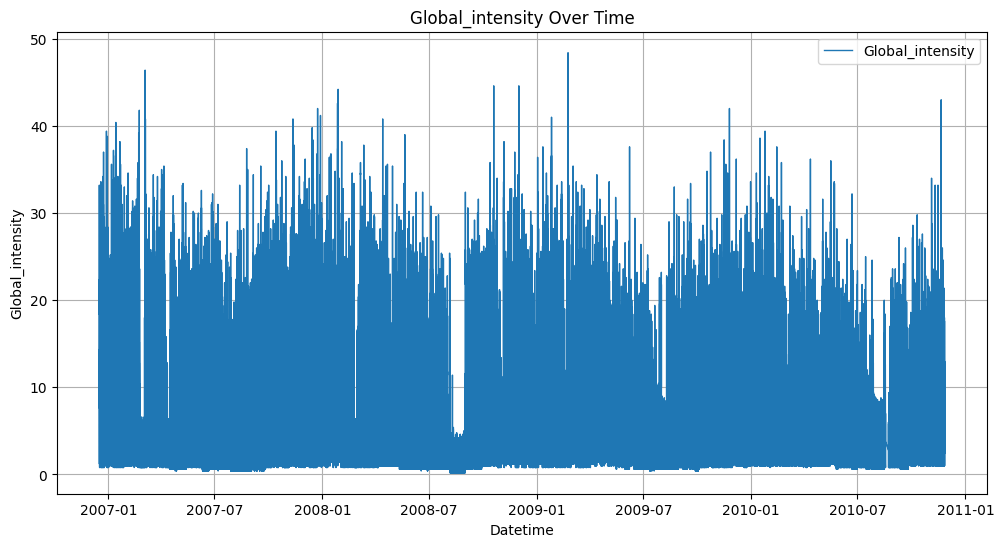

<ipython-input-10-7eb264cda14d>:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data.resample('M').mean()


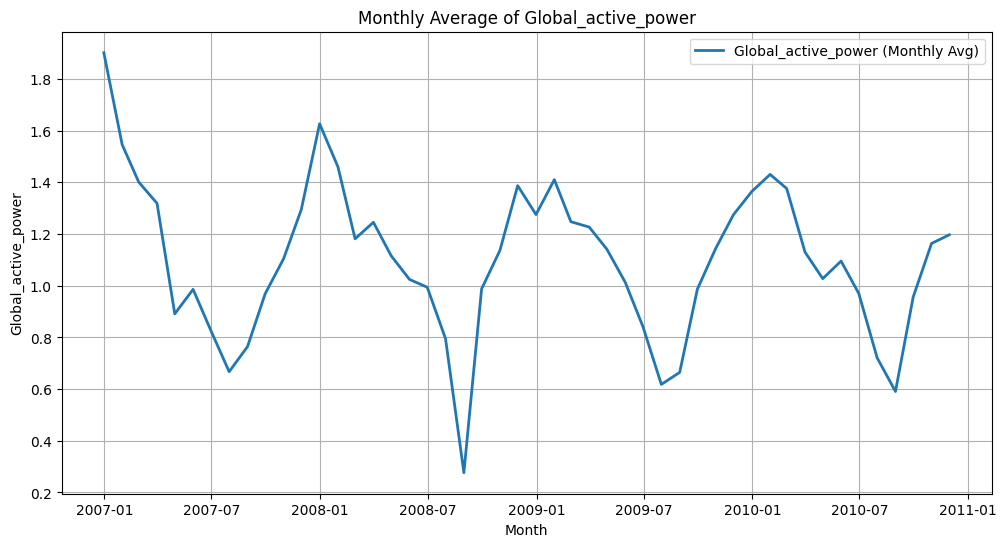

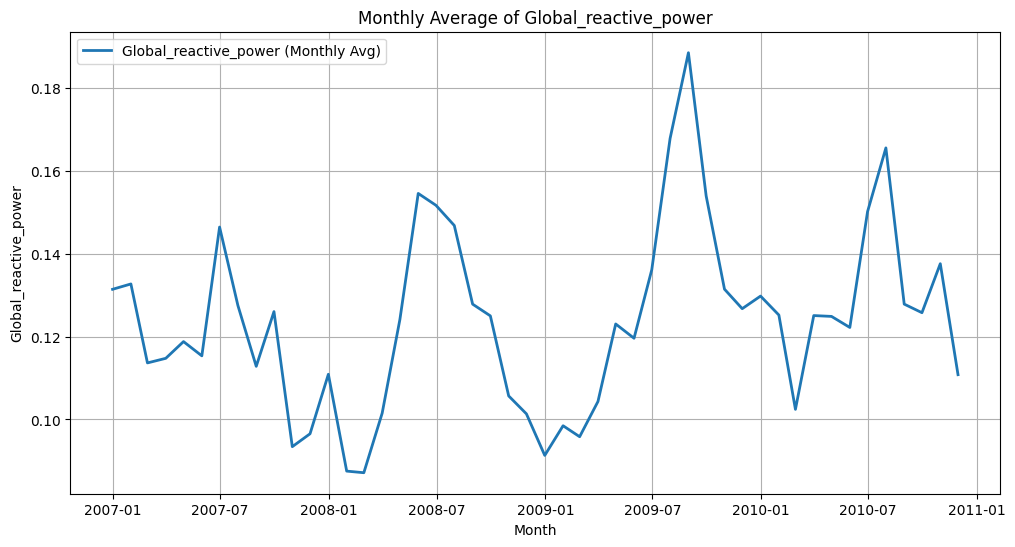

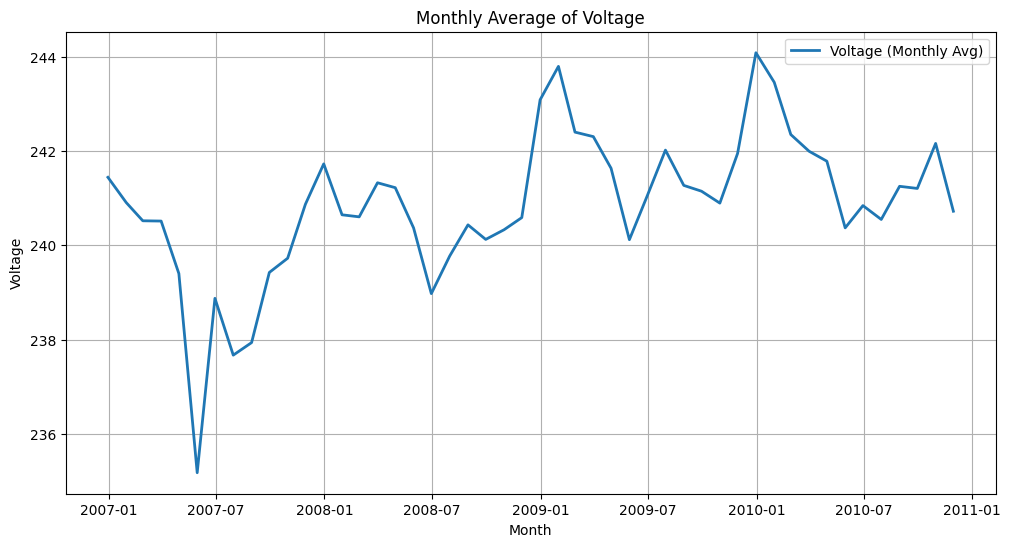

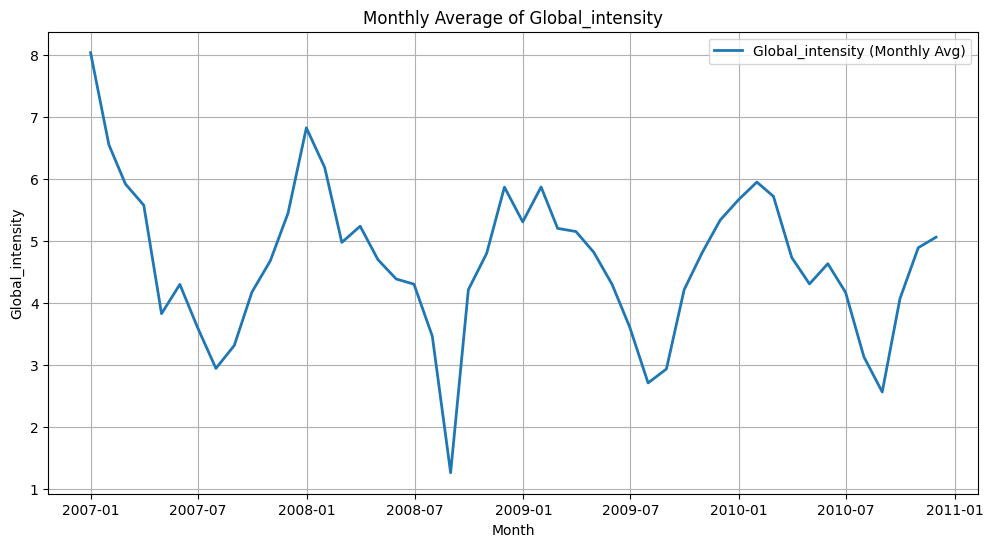

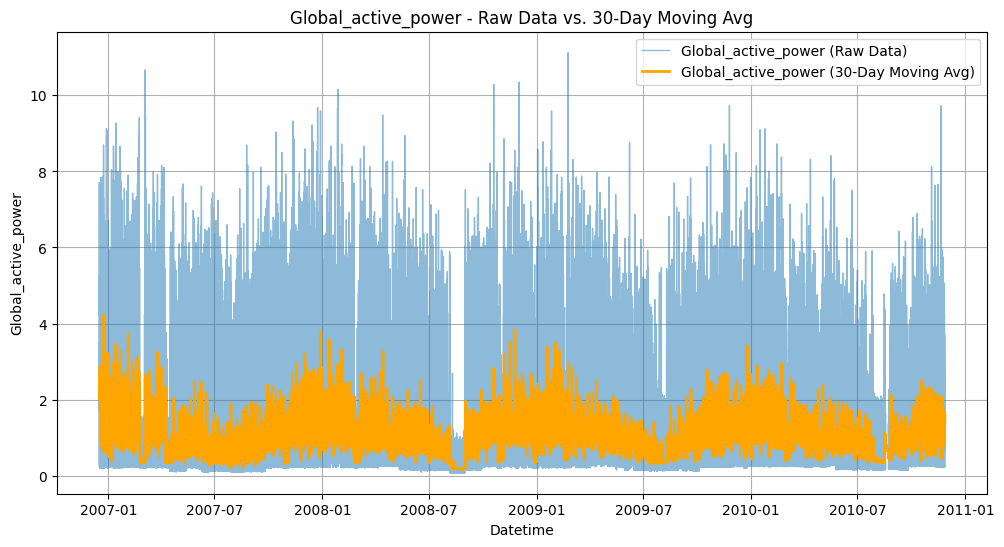

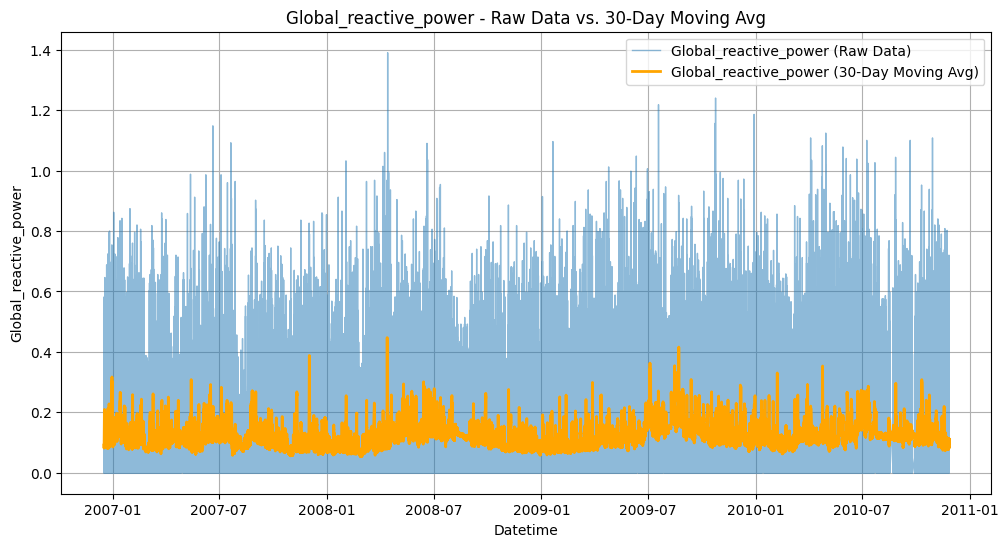

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


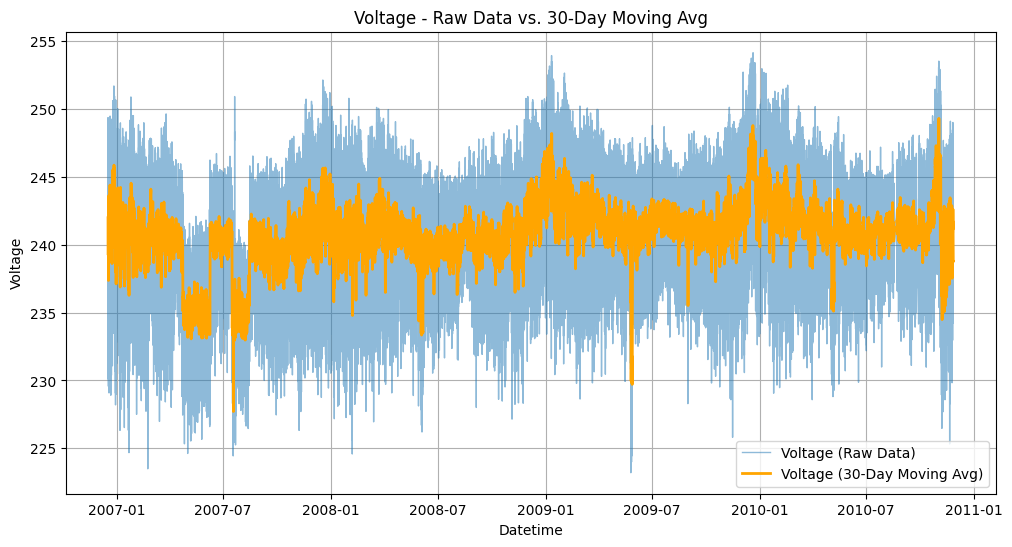

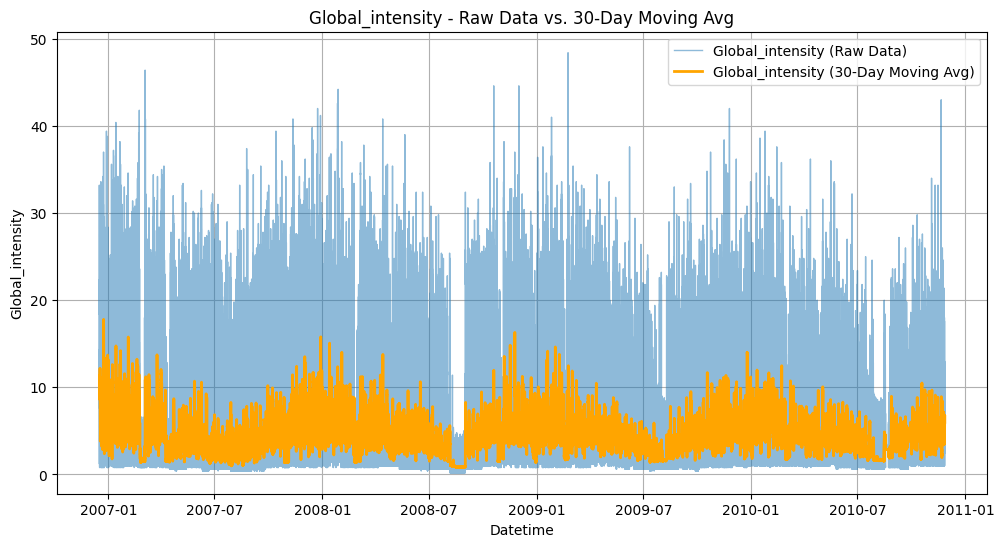

Covariance matrix:
                       Global_active_power  Global_reactive_power    Voltage  \
Global_active_power               1.117871               0.029440  -1.369431   
Global_reactive_power             0.029440               0.012706  -0.040994   
Voltage                          -1.369431              -0.040994  10.497514   
Global_intensity                  4.693812               0.133321  -5.923540   

                       Global_intensity  
Global_active_power            4.693812  
Global_reactive_power          0.133321  
Voltage                       -5.923540  
Global_intensity              19.752658  
Correlation matrix:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  

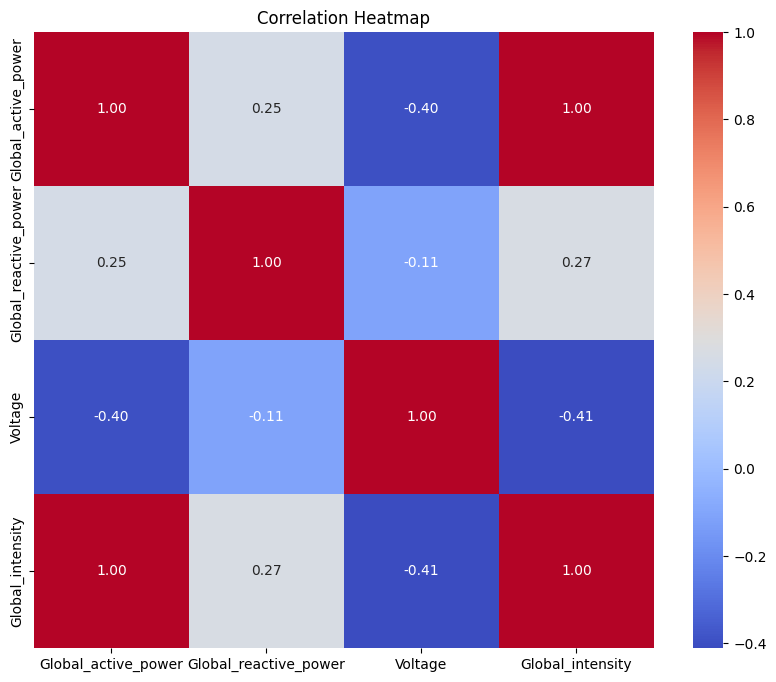

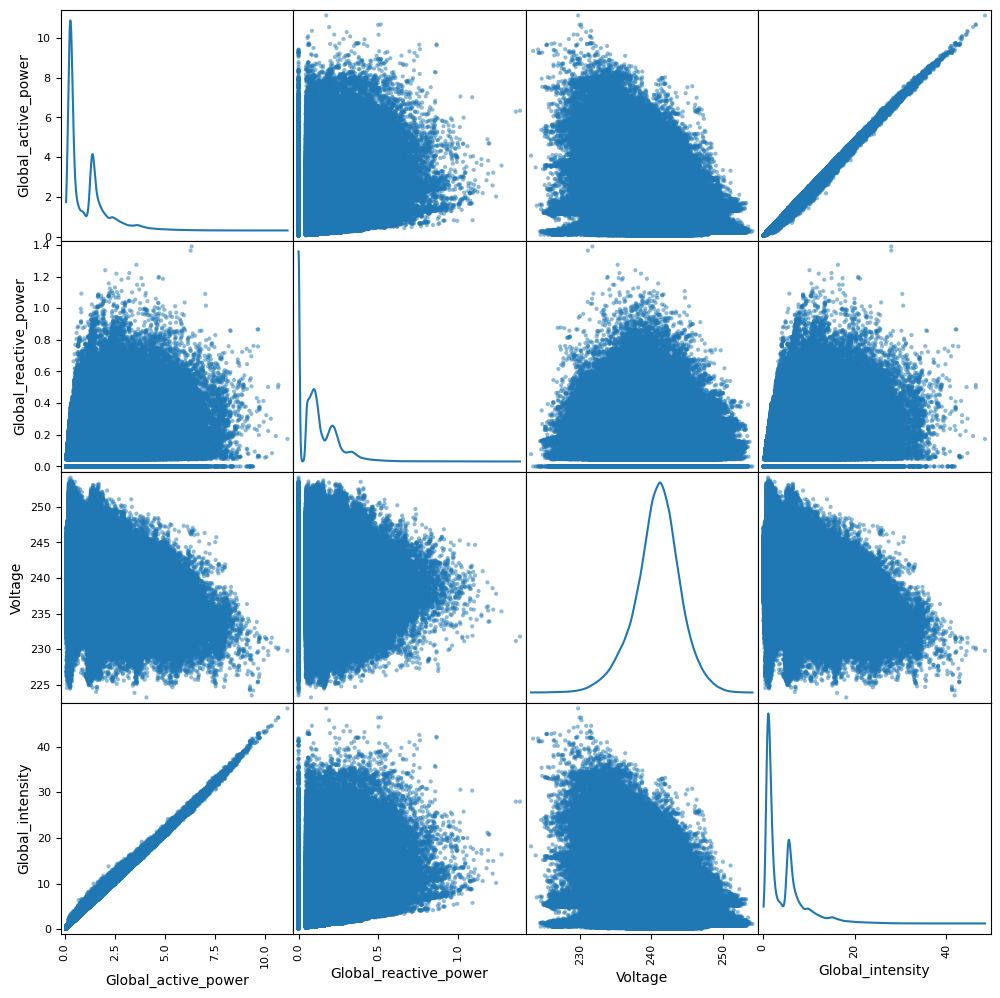

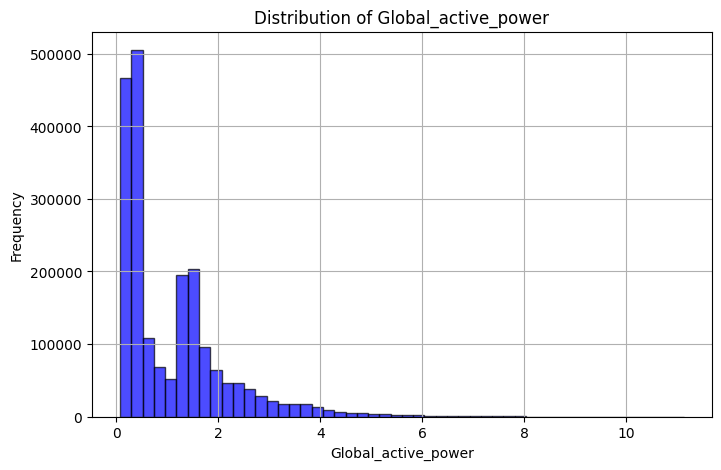

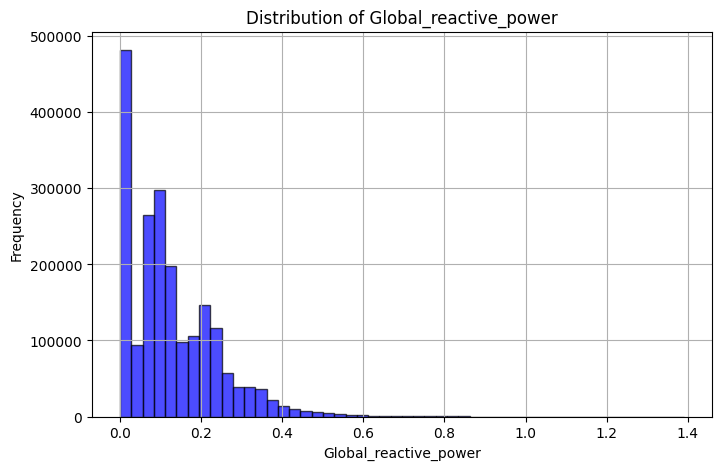

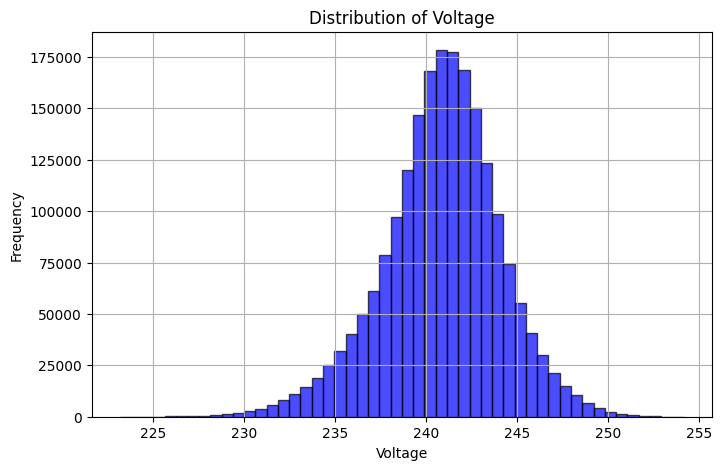

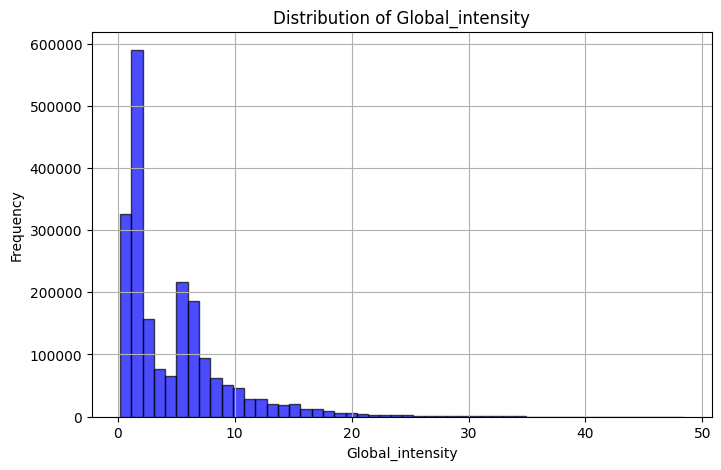

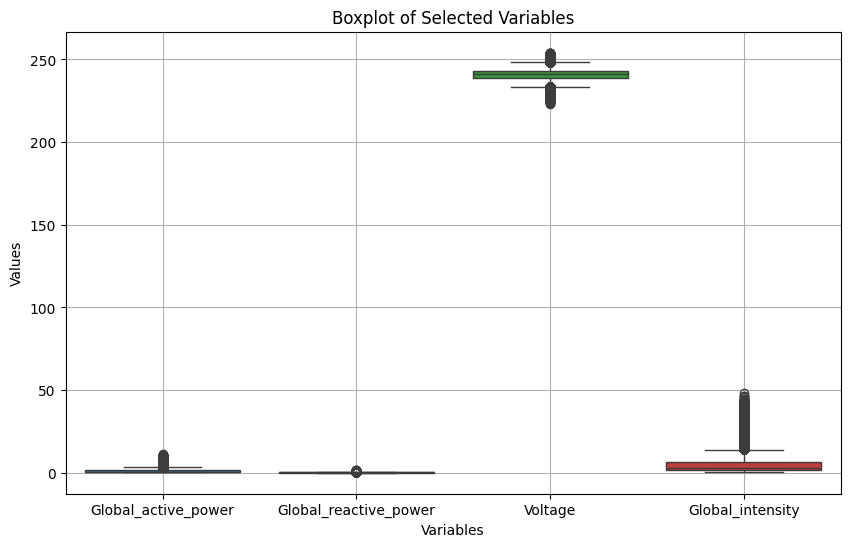


Assignment Questions and Answers:

Q: What do you notice about the pattern of missing data?
A: The missing data is irregular and seems to occur sporadically in the dataset, often due to sensor or logging issues.

Q: What method makes the most sense to you for dealing with our missing data and why?
A: Dropping rows with missing data is appropriate here since the dataset is large enough, and the missing data does not follow a predictable pattern.

Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time?
A: The chosen variables are 'Global_active_power', 'Global_reactive_power', 'Voltage', and 'Global_intensity'.
These are core metrics for analyzing household power consumption patterns and understanding relationships between them.

Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?
A: The raw data visualization reveals daily and seasonal trends. However, the granularity can be o

In [10]:
#Assignment 2_1 Data Cleaning and EDA with Time Series Data

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Collab_finalprj/IOT_Assignment_DB/household_power_consumption.txt'
data = pd.read_csv(
    file_path,
    sep=';',
    na_values=['?', 'NA'],
    low_memory=False
)

# Combine 'Date' and 'Time' into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(columns=['Date', 'Time'], inplace=True)

# Convert all other columns to numeric
for col in data.columns:
    if col != 'Datetime':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Display summary statistics
print("Summary statistics:")
print(data.describe())

# Set 'Datetime' as the index for time series analysis
data.set_index('Datetime', inplace=True)

# Select variables for visualization
variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Visualize time series for selected variables
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[var], label=var, linewidth=1)
    plt.title(f'{var} Over Time')
    plt.xlabel('Datetime')
    plt.ylabel(var)
    plt.legend()
    plt.grid()
    plt.show()

# Compute and visualize monthly averages
monthly_avg = data.resample('M').mean()
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg.index, monthly_avg[var], label=f'{var} (Monthly Avg)', linewidth=2)
    plt.title(f'Monthly Average of {var}')
    plt.xlabel('Month')
    plt.ylabel(var)
    plt.legend()
    plt.grid()
    plt.show()

# Compute and visualize 30-day moving averages
moving_avg = data[variables].rolling(window=30*24).mean()  # 30 days * 24 hours
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[var], label=f'{var} (Raw Data)', alpha=0.5, linewidth=1)
    plt.plot(moving_avg.index, moving_avg[var], label=f'{var} (30-Day Moving Avg)', linewidth=2, color='orange')
    plt.title(f'{var} - Raw Data vs. 30-Day Moving Avg')
    plt.xlabel('Datetime')
    plt.ylabel(var)
    plt.legend()
    plt.grid()
    plt.show()

# Compute and visualize covariance and correlation
# Covariance matrix
cov_matrix = data[variables].cov()
print("Covariance matrix:")
print(cov_matrix)

# Correlation matrix
corr_matrix = data[variables].corr()
print("Correlation matrix:")
print(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter matrix for pairwise relationships
pd.plotting.scatter_matrix(data[variables], figsize=(12, 12), alpha=0.5, diagonal='kde')
plt.show()

# Additional visualization: Histogram for selected variables
for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(data[var], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Additional visualization: Boxplot for selected variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[variables])
plt.title('Boxplot of Selected Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid()
plt.show()

# Answering Assignment Questions
print("\nAssignment Questions and Answers:")

# A. Load and Clean Your Data
print("\nQ: What do you notice about the pattern of missing data?\n"
      "A: The missing data is irregular and seems to occur sporadically in the dataset, often due to sensor or logging issues.")

print("\nQ: What method makes the most sense to you for dealing with our missing data and why?\n"
      "A: Dropping rows with missing data is appropriate here since the dataset is large enough, and the missing data does not follow a predictable pattern.")

# B. Visualizing the Data
print("\nQ: Which variables did you choose and why do you think they might be interesting to compare to each other over time?\n"
      "A: The chosen variables are 'Global_active_power', 'Global_reactive_power', 'Voltage', and 'Global_intensity'.\n"
      "These are core metrics for analyzing household power consumption patterns and understanding relationships between them.")

print("\nQ: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?\n"
      "A: The raw data visualization reveals daily and seasonal trends. However, the granularity can be overwhelming, making\n"
      "aggregated views like monthly or moving averages more insightful.")

print("\nQ: What patterns do you see in the monthly data? Do any of the variables seem to move together?\n"
      "A: Monthly data reveals seasonal patterns, with certain months having higher or lower power usage. Variables like\n"
      "'Global_active_power' and 'Global_intensity' exhibit similar trends, indicating a correlation.")

print("\nQ: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?\n"
      "A: The moving average provides a smoother view of short-term trends, while the monthly average highlights long-term\n"
      "seasonal patterns. Both are effective, depending on the analysis focus.")

# C. Data Covariance and Correlation
print("\nQ: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?\n"
      "A: Strong correlations exist between 'Global_active_power' and 'Global_intensity', as well as 'Voltage' and\n"
      "'Global_reactive_power'. This indicates potential multicollinearity, which should be addressed in predictive modeling tasks.")
